# 28회차 기출문제 

## 문제 1

**Data description**

-   sex : 성별

-   age : 나이

-   pstatus : 부모와의 동거 유무(T : 동거 o, A : 동거 x)

-   medu : 엄마의 교육수준

    -   0 : none

    -   1 : 초등교육(초등학교)

    -   2 : 5 \~ 9th edu

    -   3 : 중등교육(중학교, 고등학교)

    -   4 : 고등교육(대학, 대학원수준)

-   fedu : 아빠의 교육수준

    -   0 : none

    -   1 : 초등교육(초등학교)

    -   2 : 5 \~ 9th edu(5\~9학년)

    -   3 : 중등교육(중학교, 고등학교)

    -   4 : 고등교육(대학, 대학원수준)

-   guardian : 주보호자

    -   어머니

    -   아버지

    -   기타

-   traveltime : 등하교기간

    -   1 : 15분 이하

    -   2 : 15분 \~ 30분 이하

    -   3 : 30분 \~ 1시간 이하

    -   4 : 1시간 이상

-   studytime : 학습시간

    -   1 : 2시간 이하

    -   2 : 2\~5시간 이하

    -   3 : 5\~10시간 이하

    -   4 : 10시간 이상

-   failure : 학사경고 횟수

-   freetime : 자유시간(1 : 매우 낮음 \~ 5 : 매우 높음)

-   famrel : 가족관계(1 : 매우나쁨 \~ 5 : 매우우수)

-   absences : 결석 유무

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [8]:
import koreanize_matplotlib

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/qiwerr1004/ADP_go/main/28/problem1.csv')
df.head()

,sex,age,pstatus,medu,fedu,guardian,traveltime,studytime,failures,freetime,famrel,absences
0,F,18,A,4,4,mother,2,2,0,3,4,No
1,F,17,T,1,1,father,1,2,0,3,5,No
2,F,15,T,1,1,mother,1,2,3,3,4,No
3,F,15,T,4,2,mother,1,3,0,2,3,No
4,F,16,T,3,3,father,1,2,0,3,4,No


1.  **EDA를 실시하시오(5점).**

In [10]:
print("<데이터 기본정보>")
print(df.info())

<데이터 기본정보>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   pstatus     395 non-null    object
 3   medu        395 non-null    int64 
 4   fedu        395 non-null    int64 
 5   guardian    395 non-null    object
 6   traveltime  395 non-null    int64 
 7   studytime   395 non-null    int64 
 8   failures    395 non-null    object
 9   freetime    395 non-null    int64 
 10  famrel      395 non-null    int64 
 11  absences    395 non-null    object
dtypes: int64(7), object(5)
memory usage: 37.2+ KB
None


데이터셋은 총 395개의 레코드와 12개의 컬럼(변수)로 이루어져있다.

이 중 11개의 변수가 설명변수, absences(결석일수)는 종속변수이다.

<데이터 성격에 따른 분류: 일치하지 않으면 타입 변환 필요>

- 수치형 변수: age(나이), failures(학사경고 횟수)
- 범주형(순서, Ordinal):  medu(엄마 교육수준), fedu(아빠 교육수준), traveltime(통학시간), studytime(공부), freetime(쉬는시간), famrel(가족관계), absences(결석유무)
- 명목형 변수: sex(성별), pstatus(동거유무), guardian(주보호자)
  

In [11]:
# 결측 데이터는 없다.
df.isnull().sum()

sex           0
age           0
pstatus       0
medu          0
fedu          0
guardian      0
traveltime    0
studytime     0
failures      0
freetime      0
famrel        0
absences      0
dtype: int64

In [12]:
#변수 타입 변환 전 값을 확인한다.
df.failures.value_counts(normalize=True)*100

0    72.405063
1    12.658228
2     4.303797
3     4.050633
T     3.544304
A     3.037975
Name: failures, dtype: float64

In [14]:
len(df[df.failures.isin(['T', 'A'])])

26

데이터 성격에 따른 변수타입 변환에 앞서 결측치와 데이터 값을 확인한다.

failures는 학사경고 횟수로 수치형 데이터이나 "T", "A" 같은 의미를 알 수 없는 데이터가 존재한다.

T, A가 전체 데이터에서 차지하는 비율은 약 6.5%로 작은 비율을 차지하므로 적절한 대체값으로 대체하기보다는 제거를 선택한다.

In [15]:
# failures T, A 인 행 삭제
df = df[~df['failures'].isin(['T', 'A'])]
df['failures'].value_counts()

0    286
1     50
2     17
3     16
Name: failures, dtype: int64

In [19]:
# 데이터 성격에 따라 변수형태 변환을 실시
df = df.astype({col:'category' for col in ['medu', 'fedu', 'traveltime', 'studytime', 'freetime', 'famrel', 'absences']})
df = df.astype({'failures':'int64'})
df = df.replace({'No': 0, 'Yes': 1})

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   sex         369 non-null    object  
 1   age         369 non-null    int64   
 2   pstatus     369 non-null    object  
 3   medu        369 non-null    category
 4   fedu        369 non-null    category
 5   guardian    369 non-null    object  
 6   traveltime  369 non-null    category
 7   studytime   369 non-null    category
 8   failures    369 non-null    int64   
 9   freetime    369 non-null    category
 10  famrel      369 non-null    category
 11  absences    369 non-null    category
dtypes: category(7), int64(2), object(3)
memory usage: 21.1+ KB
None


In [21]:
# 먼저 수치형 변수와 범주형 변수의 통계량 확인
print("<수치형 변수 통계량>")
display(df.describe(include='number'))

print("\n<명목형 변수 통계량>")
display(df.describe(exclude='number'))

<수치형 변수 통계량>


,age,failures
count,369.000000,369.000000
mean,16.699187,0.357724
std,1.287070,0.763965
min,15.000000,0.000000
25%,16.000000,0.000000
50%,17.000000,0.000000
75%,18.000000,0.000000
max,22.000000,3.000000



<명목형 변수 통계량>


,sex,pstatus,medu,fedu,guardian,traveltime,studytime,freetime,famrel,absences
count,369,369,369,369,369,369,369,369,369,369
unique,2,2,5,5,3,4,4,5,5,2
top,F,T,4,2,mother,1,2,3,4,0
freq,194,331,120,107,258,241,183,148,180,261


<수치형 변수 분포>


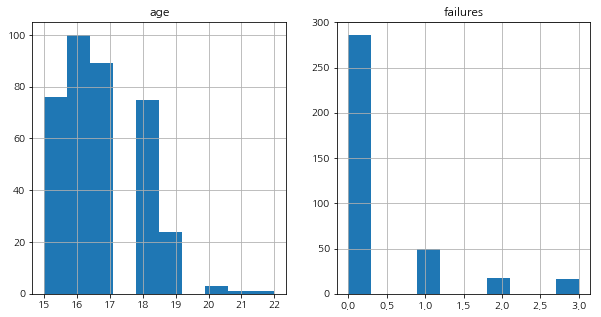

<범주형 변수 분포>


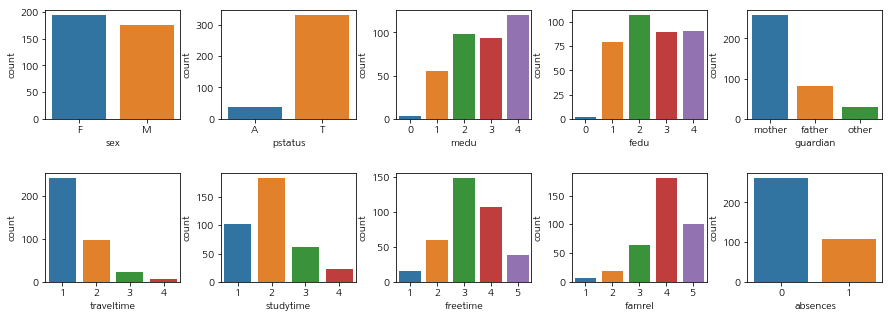

In [22]:
# 수치형 히스토그램
print("<수치형 변수 분포>")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
n_cols = df.select_dtypes('number').columns

for i, col in enumerate(n_cols):
    df[col].hist(ax=ax[i])
    ax[i].set_title(col)
plt.show()

print("<범주형 변수 분포>")
# 범주형 빈도별 count plot
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
w_cols = df.select_dtypes(['object', 'category']).columns

for i, col in enumerate(w_cols):
    x = i // 5
    y = i % 5
    sns.countplot(df[col], ax=ax[x, y])
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()


***통계량 분석***
- 수치형: age는 15~17세, 그리고 18세인 학생이 많으며, 학사경고는 받지 안은 학생의 빈도수가 가장 높다.
- 범주형:
    - 남성과 여성의 비율은 큰 차이는 없으나, 여성이 더 많다.
    - 부모와 동거하는 비율이 높으며, 어머니가 주 보호자인 경우가 높다.
    - 어머니의 교육수준은 고등교육이 가장 높으며(4), 아버지의 교육수준은 5~9학년(2)이 가장 많다.
    - 등하교 시간은 가장 짧은 15분 이하(1)가 가장 많으며, 학습시간은 2~5시간 이하(2)가 가장 많았다.
    - 자유시간은 수준"3"이 가장 많으며, 가족관계는 대체로 우수한 (4) 경우가 많았다.
    - 결석여부는 결석하지 않은 학생이 많았다.

In [23]:
# 상관관계 분석 전 문자형으로 되어있는 카테고리형 데이터를 모두 categoriy로 바꿔준다. 
df2 = df.copy()
df2 = df2.replace({'F':0, 'M':1})
df2 = df2.replace({'A':0, 'T':1})
df2 = df2.astype({col:'category' for col in ['sex', 'pstatus']})
df2 = df2.astype({col :'int64' for col in df2.select_dtypes(['category']).columns})

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         369 non-null    int64 
 1   age         369 non-null    int64 
 2   pstatus     369 non-null    int64 
 3   medu        369 non-null    int64 
 4   fedu        369 non-null    int64 
 5   guardian    369 non-null    object
 6   traveltime  369 non-null    int64 
 7   studytime   369 non-null    int64 
 8   failures    369 non-null    int64 
 9   freetime    369 non-null    int64 
 10  famrel      369 non-null    int64 
 11  absences    369 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 47.5+ KB


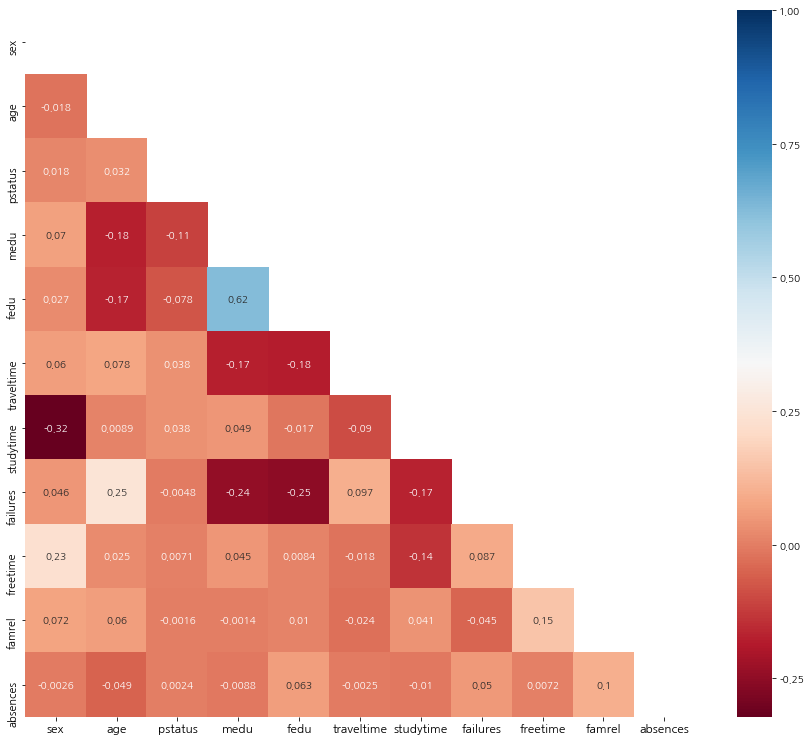

In [25]:
# 다음으로 각 변수간 상관관계를 알아본다. (종속변수에 가장 많은 영향을 끼치는 변수도 확인)
# pearson corration
plt.figure(figsize=(15, 13))
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype='bool'))
sns.heatmap(corr, mask = mask, annot=True, cmap='RdBu')
plt.xticks(fontsize=12)  # X축 글자 크기
plt.yticks(fontsize=11)  # Y축 글자 크기
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

***각 변수들 간 상관관계를 확인하기 위해 순서형 변수, 이진 명목변수를 수치형으로 변환하였다.***
- 성별과 학습시간 간에는 약한 음의 상관관계가 있다. 즉, 여성이 학습시간이 더 많은 경향이 있다.
- 어머니의 교육수준과 아버지의 교육수준 간에는 양의 상관관계가 존대한다.
- 다른 변수들 간에는 대체로 유의미한 상관관계가 보이지 않는다.

## 1-2. 데이터 품질을 살펴보고, 차원축소가 필요한지 검토하시오(5점)

차원축소는 차원이 높으며, 변수간의 중복되는 정보가 많을 때 과적합 방지, 연산속도 향상의 목적을 위해 고려하는 방식이다.

대표적인 방식은 주성분분석(PCA), LDA 등이 있다.

해당 데이터의 경우 유의미한 상관관계를 찾기 어려우며(선형적), 차원 축소 시 정보의 손실을 발생시킬 것으로 예상되기 때문에

차원축소를 고려하지 않는다.

## 1-3. 위에서 적용한 것이 과적합이라는 전제하, 해결하기 위한 방법을 2개 제시 및 구현(5점)

실제 변수 간 유의미한 상관관계는 없지만 과적합, 즉 변수 간 높은 양/음의 상관관계가 대부분 존재한다면 이를 해결하기 위한 방식으로 

1. 정규화를 통한 일반화
   * 데이터가 과적합이라는 것은 모델이 학습 데이터에 지나치게 민감하게 반응하여, 테스트 데이터나 다른 데이터 적용 시 일반화된
     결과를 반환하지 못함을 뜻하므로, 정규화를 적용하여 데이터를 일반화함으로써 과적합을 줄일 수 있다. 보통 L1(lasso), L2(ledge) 사용
2. 주성분분석(PCA)을 통한 차원축소
    * 데이터를 대표하는 새로운 축(주성분)을 생성하고, 변수 데이터를 사영하여 적절한 설명률을 가진 변수 선택
3. 앙상블 모델을 사용
    * 편향/분산을 보완하여 일반화 성능 보장


중 2, 3을 고려한다. PCA 와 bagging 을 사용하는 앙상블 모델인 randomforerest 모델을 사용한다.

- PCA는 거리기반 방식이므로 범주형 변수에 대해 on-hot encoding, 그리고 수치형 데이터 변수간 범위 일치를 위한 scaling을 실시한다.

In [173]:
df2 = df.copy()

# 스케일링, 순서가 없는 범주형 변수 one-hot encoding 실시
c_cols = ['sex', 'pstatus', 'guardian']

#순서가 있는 범주형 변수는 숫자형으로 변환
df2 = df2.astype({col:'int64' for col in df2.select_dtypes(['category']).columns})


# one-hot 전 데이터 분할
from sklearn.model_selection import train_test_split

Y = df2['absences']
X = df2.drop(columns='absences', axis=1)

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state=0, test_size=0.3, stratify = Y)


# one-hot 인코딩
train_X = pd.get_dummies(train_X, columns= c_cols, drop_first=True)
test_X = pd.get_dummies(test_X, columns=c_cols, drop_first=True)
test_X = test_X.reindex(columns=train_X.columns, fill_value=0)

print(f"데이터셋 크기: {train_X.shape} {test_X.shape}")

# 수치형 데이터 스케일링: standard scaler(age, failures)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_X[['age', 'failures']] = sc.fit_transform(train_X[['age', 'failures']])
test_X[['age', 'failures']] =sc.transform(test_X[['age', 'failures']])

데이터셋 크기: (258, 12) (111, 12)


In [174]:
print("<train set 분포>")
display(train_X[['age', 'failures']].describe().T)

print("<test set 분포>")
display(test_X[['age', 'failures']].describe().T)

<train set 분포>


,count,mean,std,min,25%,50%,75%,max
age,258.0,-2.117169e-16,1.001944,-1.314318,-0.512677,0.288963,1.090604,3.495525
failures,258.0,1.377021e-17,1.001944,-0.465952,-0.465952,-0.465952,-0.465952,3.541238


<test set 분포>


,count,mean,std,min,25%,50%,75%,max
age,111.0,0.158968,1.094576,-1.314318,-0.512677,0.288963,1.090604,4.297166
failures,111.0,0.039459,1.066367,-0.465952,-0.465952,-0.465952,-0.465952,3.541238


In [175]:
# 주성분분석(PCA)

from sklearn.decomposition import PCA
pca = PCA()

p_fit = pca.fit(train_X)

p_result = pd.DataFrame({"변수명": train_X.columns, 
                        "singular value": p_fit.singular_values_, 
                        "설명률": p_fit.explained_variance_ratio_, 
                        "누적설명률": np.cumsum(p_fit.explained_variance_ratio_)})

display(p_result)

,변수명,singular value,설명률,누적설명률
0,age,24.487358,0.283667,0.283667
1,medu,17.453908,0.144115,0.427783
2,fedu,16.264324,0.125140,0.552923
3,traveltime,15.371283,0.111775,0.664698
4,studytime,13.182713,0.082212,0.746910
5,failures,12.858487,0.078218,0.825128
6,freetime,11.363151,0.061083,0.886211
7,famrel,10.700193,0.054164,0.940375
8,sex_M,7.420109,0.026046,0.966421
9,pstatus_T,6.542982,0.020252,0.986674


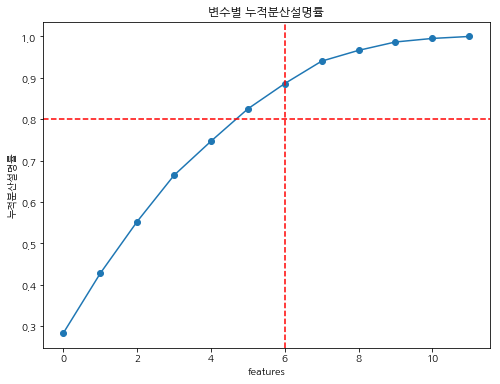

In [176]:
# 누적 scree plot 을 그려본다.
plt.figure(figsize=(8, 6))
plt.plot(p_result['누적설명률'], marker='o')
plt.title("변수별 누적분산설명률")
plt.xlabel("features")
plt.ylabel("누적분산설명률")
plt.axvline(x=6, color='r', linestyle = '--')
plt.axhline(y=0.8, color='r', linestyle = '--')
plt.show()

- PCA 실시 결과, 5개 feature 수준에서 누적분산설명률 0.8 이상이다.
  여기서는 6개 0.875843 featuer를 선택하여 다시 pca를 설정한다.
- 따라서 pca를 통해 전체 데이터의 약 87%를 설명하는 데이터로 재가공하였다.

- 데이터 비율이 1:2.3 정도로 오버샘플링을 실시할 정도로 불균형하다고 판단되지 않는다.

In [177]:
pca = PCA(n_components=6)

train_X1 = pd.DataFrame(pca.fit_transform(train_X), columns=train_X.columns[:6])
test_X1 = pd.DataFrame(pca.transform(test_X), columns=test_X.columns[:6])

test_X1.head()

,age,medu,fedu,traveltime,studytime,failures
0,-1.738366,-0.826220,-0.317649,-0.331936,1.600585,-0.110501
1,-2.013525,0.758097,0.000453,-0.080243,1.096448,-1.002373
2,2.856067,2.774511,-0.121642,1.082899,0.782572,1.258744
3,0.560817,-0.386613,-0.219796,-0.571027,-1.535113,0.942792
4,0.545796,0.997692,0.031075,-0.130181,-0.735780,-1.439486


다음으로 앙상블 모델인 random forerest를 구현한다.

이후 test set을 이용하여 성능지표를 확인한다. 주 성능지표를 auc score 로 보조 성능지표로 f1 score를 활용한다.
- 불균형이 아니라고 생각했는데 recall(재현율)이 아주 좋지 않다. f2 socre를 성능지표로 이용해 보고, 개선되지 않는다면, 
   oversampling을 고려한다.

In [178]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, make_scorer, fbeta_score


#f2 score
f2 = make_scorer(fbeta_score, beta=2, average='weighted')
kf = KFold(n_splits=3, shuffle=True, random_state=0)
rf = RandomForestClassifier(random_state=0)
params = {
    'n_estimators': [50, 100], 
    'max_depth': [3, 5], 
    'min_samples_split': [2, 5]
}

grid_f = GridSearchCV(
    estimator = rf, 
    param_grid = params, 
    scoring = 'f1', 
    cv = kf
)

grid_f.fit(train_X1, train_Y)

print(f"Best param: {grid_f.best_params_}")
print(f"Best socre: {grid_f.best_score_:.2f}")

pred_train = grid_f.predict(train_X1)
pred_test = grid_f.predict(test_X1)

print("< 학습 데이터 학습결과 >")
con1 = pd.DataFrame(confusion_matrix(train_Y, pred_train, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(train_Y, pred_train):.2f} / {roc_auc_score(train_Y, pred_train):.2f}")
display(con1)

print("< 테스트 데이터 학습결과 >")
con2 = pd.DataFrame(confusion_matrix(test_Y, pred_test, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(test_Y, pred_test):.2f} / {roc_auc_score(test_Y, pred_test):.2f}")
display(con2)

Best param: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
Best socre: 0.14
< 학습 데이터 학습결과 >
f1 score / AUC score: 0.35 / 0.61


,예측 출석,예측 결석
실제 출석,182,0
실제 결석,60,16


< 테스트 데이터 학습결과 >
f1 score / AUC score: 0.00 / 0.49


,예측 출석,예측 결석
실제 출석,78,1
실제 결석,32,0


In [179]:
#원본 데이터 결과: 차원축소 x
grid_f.fit(train_X, train_Y)

print(f"Best param: {grid_f.best_params_}")
print(f"Best socre: {grid_f.best_score_:.2f}")


pred_train = grid_f.predict(train_X)
pred_test = grid_f.predict(test_X)

print("< 학습 데이터 학습결과 >")
con1 = pd.DataFrame(confusion_matrix(train_Y, pred_train, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(train_Y, pred_train):.2f} / {roc_auc_score(train_Y, pred_train):.2f}")
display(con1)

print("< 테스트 데이터 학습결과 >")
con2 = pd.DataFrame(confusion_matrix(test_Y, pred_test, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(test_Y, pred_test):.2f} / {roc_auc_score(test_Y, pred_test):.2f}")
display(con2)

Best param: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best socre: 0.00
< 학습 데이터 학습결과 >
f1 score / AUC score: 0.00 / 0.50


,예측 출석,예측 결석
실제 출석,182,0
실제 결석,76,0


< 테스트 데이터 학습결과 >
f1 score / AUC score: 0.00 / 0.50


,예측 출석,예측 결석
실제 출석,79,0
실제 결석,32,0


**오버샘플링**

반응변수에 클래스 불균형이 존재할 경우 다수 범주에 과적합되어 소수 범주에 대한 예측 성능이 떨어지는 문제가 발생할 수 있다. 이를 해결하기 위해 오버샘플링 혹은 언더샘플링을 고려해볼 수 있다. 반응변수(absences)의 경우 빈도 불균형이 존재하므로, 오버샘플링을 고려한다.

In [180]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

smt = BorderlineSMOTE(random_state=0, k_neighbors=3, sampling_strategy='minority')
train_X_o, train_Y_o = smt.fit_resample(train_X1, train_Y)
print(Counter(train_Y_o))

Counter({0: 182, 1: 182})


In [181]:
# 오버샘플링 데이터로 다시 모델 성능측정
grid_f.fit(train_X_o, train_Y_o)

print(f"Best param: {grid_f.best_params_}")
print(f"Best socre: {grid_f.best_score_:.2f}")


pred_train = grid_f.predict(train_X_o)
pred_test = grid_f.predict(test_X1)

print("< 학습 데이터 학습결과 >")
con1 = pd.DataFrame(confusion_matrix(train_Y_o, pred_train, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(train_Y_o, pred_train):.2f} / {roc_auc_score(train_Y_o, pred_train):.2f}")
display(con1)

print("< 테스트 데이터 학습결과 >")
con2 = pd.DataFrame(confusion_matrix(test_Y, pred_test, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(test_Y, pred_test):.2f} / {roc_auc_score(test_Y, pred_test):.2f}")
display(con2)

Best param: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best socre: 0.70
< 학습 데이터 학습결과 >
f1 score / AUC score: 0.92 / 0.92


,예측 출석,예측 결석
실제 출석,163,19
실제 결석,11,171


< 테스트 데이터 학습결과 >
f1 score / AUC score: 0.32 / 0.47


,예측 출석,예측 결석
실제 출석,42,37
실제 결석,19,13


## 4.  **Random forest, neural network, Lightgbm 알고리즘 적용하여 F1 score를 구하고 성능을 비교하시오(5점).**
- 데이터가 불균형하다고 생각하지는 않지만, 데이터의 수가 전반적으로 적어 민감하게 반응하기 때문에 oversampling을 실시하였고, 
  보다 나은 성능을 보여주는 것을 확인하였다. 
- 위에서 

In [ ]:
from 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_columns = train_X.select_dtypes('object').columns

encoding_preprocess = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False)
)

preprocess = ColumnTransformer(
    [("num_process", pca_pipe, num_columns), 
    ("cat_process", encoding_preprocess, cat_columns)]
    , remainder='passthrough'
)

**Random forest**

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score, plot_roc_curve, roc_auc_score, roc_curve, f1_score
from sklearn import set_config
set_config(display="diagram")

from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline(
    [
        ("preprocess", preprocess),
        ("oversampling", RandomOverSampler(sampling_strategy='minority')),
        ("classifier", RandomForestClassifier())
    ]
)

RandomForest_param = {'classifier__max_features': np.arange(0.5, 1, 0.1)}
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)

RandomForest_search = GridSearchCV(estimator = pipe_rf, 
                      param_grid = RandomForest_param, 
                      cv = cv,
                      #cv = 5, # KFold 5
                      scoring = 'f1_macro')
RandomForest_search.fit(train_X, train_y)

In [ ]:
print('Random Forest f1 score : ', RandomForest_search.best_score_)

**neural network**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_pipe = Pipeline(
    [
        ("preprocess", preprocess),
        ("oversampling", RandomOverSampler(sampling_strategy='minority')),
        ("classifier", MLPClassifier())
    ]
)

MLP_param = {'classifier__learning_rate_init': np.arange(0.01, 0.2, 0.02)}
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)

MLP_search = GridSearchCV(estimator = mlp_pipe, 
                      param_grid = MLP_param, 
                      cv = cv,
                      #cv = 5, # KFold 5
                      scoring = 'f1_macro')
MLP_search.fit(train_X, train_y)

In [ ]:
print('MLP f1 score : ', MLP_search.best_score_)

**Lightgbm**

In [ ]:
from lightgbm import LGBMClassifier

pipe_lgb = Pipeline(
    [
        ("preprocess", preprocess),
        ("oversampling", RandomOverSampler(sampling_strategy='minority')),
        ("classifier", LGBMClassifier())
    ]
)
#LGBMClassifier().get_params()
lgb_param = {'classifier__learning_rate': np.arange(0.01, 0.3, 0.05)}
cv = KFold(n_splits = 5, shuffle = True, random_state = 0)

lgb_search = GridSearchCV(estimator = pipe_lgb, 
                      param_grid = lgb_param, 
                      cv = cv,
                      #cv = 5, # KFold 5
                      scoring = 'f1_macro')
lgb_search.fit(train_X, train_y)

In [ ]:
print('LGBM f1 score : ', lgb_search.best_score_)

교차검증 score 기준으로 MLP 모델의 성능이 가장 높다.

In [ ]:
pred_mlp = MLP_search.predict(test_X)
print(f1_score(test_y, pred_mlp, average = 'macro'))

최종 테스트 데이터에서의 f1-score = 0.43인 것을 확인할 수 있다.

5.  **하드 보팅 기법을 적용하고, 이전 결과와 비교하시오(5점).**

In [ ]:
from sklearn.ensemble import VotingClassifier
rf_best_param = RandomForest_search.best_params_
mlp_best_param = MLP_search.best_params_
lgbm_best_param = lgb_search.best_params_

rf_best_param = list(rf_best_param.values())[0]
mlp_best_param = list(mlp_best_param.values())[0]
lgbm_best_param = list(lgbm_best_param.values())[0]

voting_hard = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(max_features = rf_best_param)),
    ('mlp', MLPClassifier(learning_rate_init = mlp_best_param)),
    ('lgb', LGBMClassifier(learning_rate =  lgbm_best_param))
], voting='hard')

pipe_voting1 = Pipeline(
    [
        ("preprocess", preprocess),
        ("oversampling", RandomOverSampler(sampling_strategy='minority')),
        ("classifier", voting_hard)
    ]
)

pipe_voting1.fit(train_X, train_y)

In [ ]:
pred_voting = pipe_voting1.predict(test_X)
print(f1_score(test_y, pred_voting, average = 'macro'))

최종 테스트 데이터에서의 f1-score = 0.50인 것을 확인할 수 있다. 하드 보팅 기법을 적용했을 때, 모델 성능이 개선된다.

6.  **추가적인 처리 방안이 있으면 제시하시오(5점).**

-   변수 선택

불필요한 변수는 모델의 복잡성을 증가시킬 수 있으므로, 변수 선택 방법을 통해 모델을 단순화할 수 있다. Voting 모델의 경우 Permutation importance 방식을 통해 변수 중요도를 산출할 수 있다.

In [ ]:
from sklearn.inspection import permutation_importance
feature_importances = permutation_importance(
    pipe_voting1, train_X, train_y, n_repeats=10, random_state=42
)

import matplotlib.pyplot as plt

#plt.clf()
features = train_X.columns
importances = feature_importances.importances_mean

plt.bar(features, importances); 
plt.xticks(rotation=90);
plt.show();

변수 중요도를 기준으로 famrel, studytime, traveltime, age 변수를 선택할 수 있다.

7.  **학교 운영시스템에 적용한다면 검토사항은 무엇이 있을지 제시하시오(5점).**

In [ ]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

selected_columns = ['famrel', 'studytime', 'traveltime', 'age']

fig, ax = plt.subplots(figsize=(5, 5))
plt.subplots_adjust(top=0.9, hspace=0.7)
plot_partial_dependence(estimator=MLP_search, 
                        X=train_X, 
                        features=selected_columns, # 관심변수 
                        percentiles=(0, 1), # 최소, 최대 
                        ax=ax);

plt.tight_layout();                        
plt.show();

-   가족관계가 좋을수록, 결석할 확률은 높아지는 경향이 있다.

    -   해당 결과는 데이터 수집 과정에 대해 조사해볼 필요가 있어보인다.

-   공부 시간이 늘어날수록, 결석할 확률은 낮아지는 경향이 있다.

    -   최소 공부 시간을 확보할 수 있는 다양한 교육 프로그램 운영이 필요하다.

-   나이가 들어갈수록, 결석할 확률은 높아지는 경향이 있다.

    -   저학년의 경우 학교에 적응하는 시간이 필요하므로, 학교를 성실히 다닐 수 있도록, 조기 교육이 필요해보인다.

## 문제 2

**Data description**

-   **customer_id :** 고객의 고유 ID

-   **age : 나이**

-   **income** : 고객의 월 수입

-   **email_open_rate** : 고객이 이메일을 연 비율

-   **campaign_type : 마케팅 캠페인 타입**

    -   'Sale', 'Discount', 'NewArrival'

-   **clicks : 고객이 마케팅 캠페인에서 클릭한 횟수(target)**

In [ ]:
dat = pd.read_csv('problem2.csv')

1.  **데이터 전처리를 수행하시오.**

In [ ]:
print(dat['campaign_type'].value_counts())

campaign_type 변수에 \@#!특수 문자가 존재하므로, 제거한다.

In [ ]:
import re
dat['campaign_type'] = dat['campaign_type'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
print(dat['campaign_type'].value_counts())

단순 인덱스 칼럼인 ...1, customer_id 칼럼 경우 정보량이 없으므로 제거한다.

In [ ]:
adat = dat.drop(columns=['Unnamed: 0', 'customer_id'])

2.  **캠페인 타입이 'Sale'인지 여부에 따라 새로운 파생변수를 생성하시오.**

In [ ]:
dat['is_sale'] = np.where(dat['campaign_type'] == 'Sale', 1, 0)

3.  **포아송 회귀 모델을 적합하고, 모델의 통계적 유의성을 검토하시오.**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

poisson_model = smf.glm(formula='clicks ~ age + income + email_open_rate + C(is_sale)', 
                        data=dat, 
                        family=sm.families.Poisson()).fit()

In [ ]:
from scipy import stats
residual_deviance = poisson_model.deviance
df_resid = poisson_model.df_resid
p_value = stats.chi2.sf(residual_deviance, df_resid) # CDF 계산 
print(f"p-value: {p_value}")

-   $H_0$ : 단순 모델(상수항만 포함된 모델)이 데이터에 적합하다.
-   $H_1$ : 현재 모델이 데이터에 적합하다.

유의수준 5%에서 p-value가 작으므로 귀무가설을 기각한다. 따라서 현재 모델이 단순 모델에 비해 데이터에 더 적합하다.

4.  **회귀 계수의 통계적 유의성을 확인하고, 해석하시오.**

In [ ]:
print(poisson_model.summary())

-   $H0$: 나이의 회귀계수는 0이다.

-   $H1$: 나이의 회귀계수는 0이 아니다.



유의수준 5%에서 모든 설명변수의 p-value가 크므로 귀무가설을 기각할 수 없다. 따라서 나이는 click 칼럼과 통계적으로 유의미한 관계가 없다.

나이와 마찬가지로 income, email_open_rate, is_sale 변수는 click 칼럼과 통계적으로 유의미한 관계가 없다.

5.  **Random forest 모델을 적합하고, 포아송 회귀와 모델 성능을 비교하시오(평가 지표 : RMSE).**

모델 평가를 위해 훈련 데이터와 테스트 데이터를 분할한다. 단순 무작위 샘플링을 통해 훈련 데이터와 테스트 데이터를 7:3으로 분할한다.

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dat, test_size=0.3, random_state=1)

X_train = train[['age', 'income', 'email_open_rate', 'is_sale']]
y_train = train['clicks']
X_test = test[['age', 'income', 'email_open_rate', 'is_sale']]
y_test = test['clicks']

**poisson regression**

In [ ]:
pred_pois = poisson_model.predict(X_test)

**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_pois = mean_squared_error(y_test, pred_pois)
mse_rf = mean_squared_error(y_test, pred_rf)
print(f"MSE for Poisson Regression: {mse_pois}")
print(f"MSE for Random Forest: {mse_rf}")

포아송 회귀 모델의 모델 성능이 더 높다.

## 문제 3

In [ ]:
dat = pd.read_csv('problem3.csv')

1.  **시간별, 제조사별 불량률 데이터로 생존분석을 시행한 후 25, 30, 35개월 후의 불량률을 계산하시오(5점).**

In [ ]:
from lifelines import KaplanMeierFitter
kmf_X = KaplanMeierFitter()
kmf_Y = KaplanMeierFitter()

company_X = dat.loc[dat.company == 'X']
company_Y = dat.loc[dat.company == 'Y']

kmf_X.fit(durations=company_X['time'], event_observed=company_X['status'], label='Company X')
# 제조사 B에 대해 생존 함수 적합
kmf_Y.fit(durations=company_Y['time'], event_observed=company_Y['status'], label='Company Y')

# 그래프 그리기
kmf_X.plot_survival_function();
kmf_Y.plot_survival_function();
plt.title('Kaplan-Meier Curve by Company');
plt.show();

25, 30, 35 시점에 생존 확률은 다음과 같다.

In [ ]:
times = [25, 30, 35]
survival_probs_X = kmf_X.predict(times)
survival_probs_Y = kmf_Y.predict(times)

print('company X : \n', survival_probs_X)
print('company Y : \n', survival_probs_Y)

생존 확률을 불량률로 변환한다.

In [ ]:
failure_rates_X = 1 - survival_probs_X
failure_rates_Y = 1 - survival_probs_Y

제조사 X에 대한 불량률은 다음과 같다.

In [ ]:
print(f"Company X의 불량률 \n: {failure_rates_X}")

제조사 Y에 대한 불량률은 다음과 같다.

In [ ]:
print(f"Company Y의 불량률 \n: {failure_rates_Y}")

2.  **로그 순위법으로 제조사별 불량률의 차이가 있는지 검정하시오(5점).**

로그 순위법은 두 생존 곡선이 차이가 있는지 검정하는 비모수적 방법입니다. `survdiff` 함수에 구현되어 있으며, 유의 수준 0.05에서 검정을 실시하는 방법입니다.

-   $H_0$: 두 생존 함수는 동일하다. $S_X(t) = S_Y(t)$ for all $t$
-   $H_1$: 두 생존 함수는 같지 않다. $S_X(t) \neq S_Y(t)$ for some $t$

In [ ]:
from lifelines.statistics import logrank_test
results = logrank_test(company_X['time'], company_Y['time'], 
                       event_observed_A=company_X['status'], 
                       event_observed_B=company_Y['status'])

p_value = results.p_value
print(f"Log-rank test p-value: {p_value}")

유의수준 0.05에서 p-value=0.056으로 크므로, 귀무가설을 기각할 수 없다. 따라서, 제조사 A, B의 불량률에는 통계적으로 유의미한 차이가 없습니다.

## 문제 4

별도의 데이터 없음

**다음 표는 슬통 Food의 신제품 홍보 설문 조사 결과이다. 시식 행사에 참여한 고객들의 시식 후 구매 의사의 변화가 있는지 없는지 검정하시오(10점).**

| 구분         | 시식 후 있음 | 시식 후 없음 |
|--------------|--------------|--------------|
| 시식 전 있음 | 23           | 7            |
| 시식 전 없음 | 18           | 12           |

-   $H_0$ : 시식 전후 구매의사에는 변화가 없다.
-   $H_1$ : 시식 전후 구매의사에는 변화가 있다.

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

tt = np.array([[23, 18],
               [7, 12]])

result = mcnemar(tt, exact=False, correction=False)
print(f"McNemar test statistic: {result.statistic}")
print(f"p-value: {result.pvalue}")

유의수준 5%에서 p-value=0.02781로 작으므로, 귀무가설을 기각할 수 있다. 따라서 시식 전후 구매 의사에 변화가 있다는 통계적 근거가 충분하다.

## 문제 5

**두 개의 고등학교 학생들의 시험 표준 점수가 들어있습니다. 각 학생의 성적이 서로 독립적이라고 가정할 때, 두 학교의 표준 점수 분포에 유의미한 차이가 있는지 검정하시오(10점).**

In [ ]:
dat = pd.read_csv('problem5.csv')

In [ ]:
dat.isna().sum()

school_A에 결측치가 12개 존재한다. school_A의 결측치를 삭제한다. 

In [ ]:
score_A = dat['school_A'].dropna().values
score_B = dat['school_B'].values

-   $H_0$ : 두 학교의 점수 분포는 같다.
-   $H_1$ : 두 학교의 점수 분포는 다르다.

In [ ]:
from scipy.stats import ks_2samp
statistic, p_value = ks_2samp(score_A, score_B)
print(f"KS Test statistic: {statistic}")
print(f"p-value: {p_value}")

유의수준 5%에서 p-value=0.485 크므로, 귀무가설을 기각할 수 없다. 따라서 두 학교의 점수 분포는 같은 분포에서 나왔다고 할 수 있다.

## 문제 6

슬통 병원 환자들의 건강 검진 정보가 들어있습니다. 다음의 물음에 답하시오.

In [ ]:
dat = pd.read_csv('problem6.csv')

1.  **몸무게를 제어했을 때, 나이와 콜레스테롤 상관계수 및 유의확률을 구하라(5점).**

In [ ]:
import pingouin as pg
result = pg.partial_corr(data=dat, x='AGE_GROUP', y='TOT_CHOLE', covar='WEIGHT')
print(result)

-   $H_0$ : 몸무게를 통제했을 때, 나이와 콜레스테롤의 상관계수는 0이다.

-   $H_1$ : 몸무게를 통제했을 때, 나이와 콜레스테롤의 상관계수는 0이 아니다.

편상관계수는 0.0167, p-value는 0.2826이다.

2.  **유의수준 0.05 하에서 통계적 의사결정을 수행하라(5점).**

유의수준 5%에서 p-value=0.2826로 크므로, 귀무가설을 기각할 수 없다. 따라서 몸무게를 통제했을 때, 나이와 콜레스테롤 간에는 통계적으로 유의미한 관계가 없다.